In [1]:
from dataset import *
from hmm import *

In [2]:
import numpy as np
import pandas as pd
np.random.seed(0)

In [3]:
hi_ds = get_dataset("ai4bharat/naamapadam", "hi", use_pickle=True)
te_ds = get_dataset("ai4bharat/naamapadam", "te", use_pickle=True)
ml_ds = get_dataset("ai4bharat/naamapadam", "ml", use_pickle=True)
sa_ds = get_dataset("wikiann", "sa", use_pickle=True)

datasets = {
    "Hindi": hi_ds,
    "Telugu": te_ds,
    "Malayalam": ml_ds,
    "Sanskrit": sa_ds
}

lang_codes = {
    "Hindi": "hi",
    "Telugu": "te",
    "Malayalam": "ml",
    "Sanskrit": "sa"
}

Evaluating model performance on same language

Hindi language HMM model evaluated on Hindi language
Weighted F1 of HMM = 0.7112
              precision    recall  f1-score   support

           1      0.806     0.778     0.792     10812
           2      0.788     0.815     0.801     10109
           3      0.711     0.599     0.651      9992
           4      0.516     0.666     0.581     11759
           5      0.796     0.815     0.805     10511
           6      0.412     0.606     0.491      2874

   micro avg      0.685     0.727     0.706     56057
   macro avg      0.671     0.713     0.687     56057
weighted avg      0.703     0.727     0.711     56057



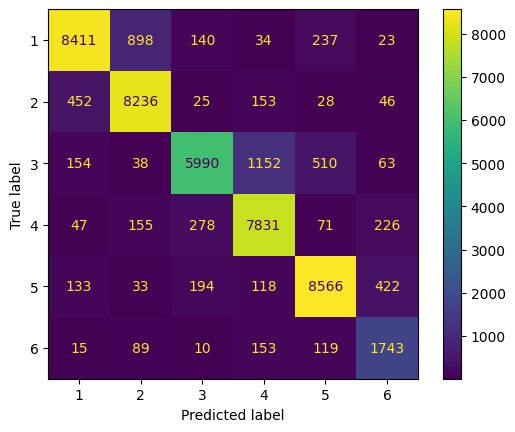


Telugu language HMM model evaluated on Telugu language
Weighted F1 of HMM = 0.7475
              precision    recall  f1-score   support

           1      0.829     0.787     0.808      2604
           2      0.788     0.810     0.799      2189
           3      0.707     0.657     0.681      1296
           4      0.540     0.735     0.622      1231
           5      0.797     0.755     0.776      1525
           6      0.381     0.608     0.468       260

   micro avg      0.728     0.757     0.742      9105
   macro avg      0.674     0.725     0.692      9105
weighted avg      0.745     0.757     0.747      9105



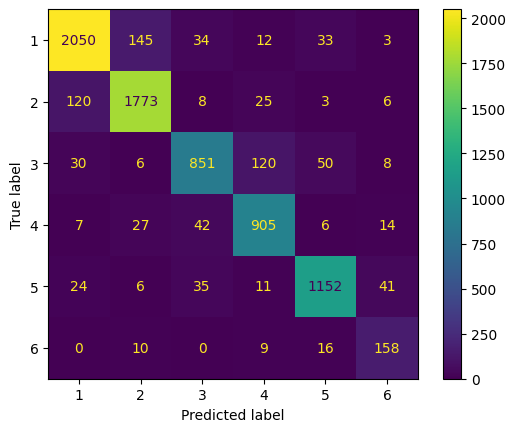


Malayalam language HMM model evaluated on Malayalam language
Weighted F1 of HMM = 0.7366
              precision    recall  f1-score   support

           1      0.821     0.766     0.793      3283
           2      0.805     0.781     0.793      2811
           3      0.722     0.610     0.661      1491
           4      0.493     0.569     0.528      1094
           5      0.817     0.775     0.796      2092
           6      0.340     0.538     0.417       392

   micro avg      0.740     0.724     0.731     11163
   macro avg      0.666     0.673     0.665     11163
weighted avg      0.754     0.724     0.737     11163



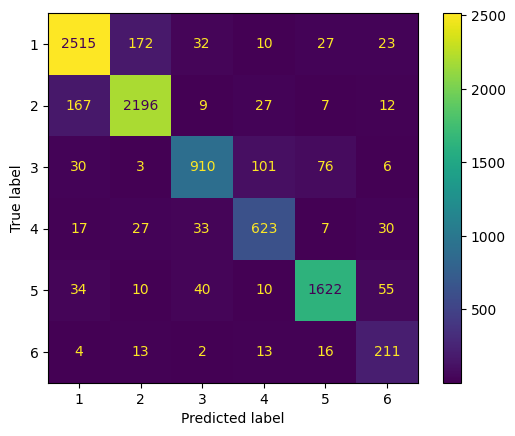


Sanskrit language HMM model evaluated on Sanskrit language
Weighted F1 of HMM = 0.4203
              precision    recall  f1-score   support

           1      0.783     0.228     0.353        79
           2      0.704     0.317     0.437       120
           3      0.800     0.563     0.661        71
           4      0.541     0.505     0.522       105
           5      0.450     0.191     0.269        94
           6      0.031     0.286     0.057        28

   micro avg      0.337     0.352     0.344       497
   macro avg      0.551     0.348     0.383       497
weighted avg      0.610     0.352     0.420       497



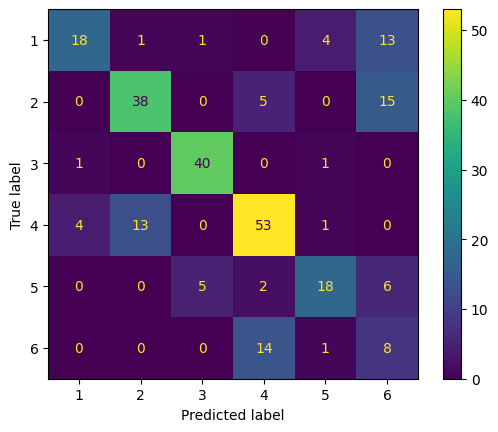

In [4]:
print("Evaluating model performance on same language")
print("================================================================\n")

models = {}
for lang, ds in datasets.items():
    print("{0} language HMM model evaluated on {1} language".format(lang, lang))
    train_dataset = ds['train']
    test_dataset = combine_dataset_splits(ds, ['val', 'test'])
    
    model = train_hmm(train_dataset)
    models[lang] = model
    
    y_test = test_dataset['ner_tags'].explode().to_list()
    y_pred = test_hmm(model, test_dataset)

    eval_results_hmm(y_test, y_pred, clf_report=True, conf_matrix=True, exclude_0=True)

In [5]:
tgt_lang = "Sanskrit"
print("Evaluating model performance on {0} language without transliteration".format(tgt_lang))
print("================================================================\n")

for lang, ds in datasets.items():
    if lang == tgt_lang:
        continue
    
    print("{0} language HMM model evaluated on Sanskrit language without transliteration".format(lang, tgt_lang))
    train_dataset = ds['train']
    test_dataset = combine_dataset_splits(datasets[tgt_lang], ['val', 'test'])
    
    model = models[lang]
    
    y_test = test_dataset['ner_tags'].explode().to_list()
    y_pred = test_hmm(model, test_dataset)

    eval_results_hmm(y_test, y_pred, clf_report=True, conf_matrix=False, exclude_0=True)

Evaluating model performance on Sanskrit language without transliteration

Hindi language HMM model evaluated on Sanskrit language without transliteration
Weighted F1 of HMM = 0.2925
              precision    recall  f1-score   support

           1      0.369     0.392     0.380        79
           2      0.590     0.600     0.595       120
           3      0.273     0.042     0.073        71
           4      0.615     0.152     0.244       105
           5      0.200     0.106     0.139        94
           6      0.000     0.000     0.000        28

   micro avg      0.446     0.266     0.333       497
   macro avg      0.341     0.216     0.239       497
weighted avg      0.408     0.266     0.292       497


Telugu language HMM model evaluated on Sanskrit language without transliteration
Weighted F1 of HMM = 0.0000
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        79
           2      0.000     0.000     0.000       120
 

In [6]:
tgt_lang = "Sanskrit"
print("Evaluating model performance on {0} language with transliteration".format(tgt_lang))
print("================================================================\n")

for lang, ds in datasets.items():
    if lang == tgt_lang:
        continue
    
    print("{0} language HMM model evaluated on Sanskrit language with transliteration".format(lang, tgt_lang))
    train_dataset = ds['train']
    trans_dataset = transliterate_dataset(datasets[tgt_lang], lang_codes[tgt_lang], lang_codes[lang])
    test_dataset = combine_dataset_splits(trans_dataset, ['val', 'test'])
    
    model = models[lang]
    
    y_test = test_dataset['ner_tags'].explode().to_list()
    y_pred = test_hmm(model, test_dataset)

    eval_results_hmm(y_test, y_pred, clf_report=True, conf_matrix=False, exclude_0=True)

Evaluating model performance on Sanskrit language with transliteration

Hindi language HMM model evaluated on Sanskrit language with transliteration
Weighted F1 of HMM = 0.2925
              precision    recall  f1-score   support

           1      0.369     0.392     0.380        79
           2      0.590     0.600     0.595       120
           3      0.273     0.042     0.073        71
           4      0.615     0.152     0.244       105
           5      0.200     0.106     0.139        94
           6      0.000     0.000     0.000        28

   micro avg      0.446     0.266     0.333       497
   macro avg      0.341     0.216     0.239       497
weighted avg      0.408     0.266     0.292       497


Telugu language HMM model evaluated on Sanskrit language with transliteration
Weighted F1 of HMM = 0.1973
              precision    recall  f1-score   support

           1      0.379     0.278     0.321        79
           2      0.615     0.333     0.432       120
          